In [17]:
import pandas as pd
import numpy as np

In [18]:
abandoned_df = pd.read_csv('/Users/kaziamithasan/Desktop/Research/msr25/msr25-mining-challenge/code/active_projects_with_labels.csv')

In [19]:
abandoned_df


,artifact_id,release_id,release_version,release_timestamp,interval,is_abandoned,label,time_gap
0,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.2,0.2.2,2015-05-02 01:12:05,NaN,0,Start,NaN
1,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.3,0.2.3,2015-05-03 21:07:03,1.829838,0,Active,1 days 19:54:58
2,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.4,0.2.4,2016-05-04 10:51:54,366.572812,0,Dormant,366 days 13:44:51
3,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.5,0.2.5,2023-01-25 22:10:44,2457.471412,0,Dormant,2457 days 11:18:50
4,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.6,0.2.6,2023-01-25 22:59:18,0.033727,0,Active,0 days 00:48:34
...,...,...,...,...,...,...,...,...
10229182,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.2,1.0.2,2017-12-13 16:03:48,205.366493,0,Active,205 days 08:47:45
10229183,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.3,1.0.3,2020-10-29 22:57:17,1051.287141,0,Dormant,1051 days 06:53:29
10229184,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.4,1.0.4,2022-08-25 17:07:58,664.757419,0,Dormant,664 days 18:10:41
10229185,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.5,1.0.5,2022-09-17 11:27:22,22.763472,0,Active,22 days 18:19:24


In [20]:

# Convert 'release_timestamp' to datetime if not already
abandoned_df['release_timestamp'] = pd.to_datetime(abandoned_df['release_timestamp'])

# Calculate the duration and total releases per artifact
artifact_stats = abandoned_df.groupby('artifact_id').agg(
    first_release=('release_timestamp', 'min'),
    last_release=('release_timestamp', 'max'),
    total_releases=('release_id', 'count')
).reset_index()


In [21]:
artifact_stats

,artifact_id,first_release,last_release,total_releases
0,aero.m-click:mcpdf,2015-05-02 01:12:05,2023-01-28 01:42:16,9
1,africa.shuwari.sbt:sbt-shuwari-core_2.12_1.0,2023-08-01 19:26:50,2024-04-02 12:45:18,6
2,africa.shuwari.sbt:sbt-shuwari-header_2.12_1.0,2023-08-01 19:26:51,2024-04-02 12:45:18,6
3,africa.shuwari.sbt:sbt-shuwari-js_2.12_1.0,2023-08-01 19:26:49,2024-04-02 12:45:17,6
4,africa.shuwari.sbt:sbt-shuwari-mode_2.12_1.0,2023-08-01 19:26:51,2024-04-02 12:45:19,6
...,...,...,...,...
196275,zone.src.sheaf:java-sheaf,2015-01-23 11:38:51,2023-08-21 12:09:42,17
196276,zone.src.sheaf:logback-sheaf,2015-03-20 08:18:15,2023-08-21 10:56:45,11
196277,zone.src.sheaf:sheaf-deps-bom,2017-05-06 11:42:13,2023-08-21 11:56:48,5
196278,zone.src.sheaf:sheaf-parent,2015-01-23 10:37:20,2023-08-21 09:29:38,20


In [22]:
artifact_stats['duration (days)'] = (artifact_stats['last_release'] - artifact_stats['first_release']).dt.days


In [23]:
artifact_stats


,artifact_id,first_release,last_release,total_releases,duration (days)
0,aero.m-click:mcpdf,2015-05-02 01:12:05,2023-01-28 01:42:16,9,2828
1,africa.shuwari.sbt:sbt-shuwari-core_2.12_1.0,2023-08-01 19:26:50,2024-04-02 12:45:18,6,244
2,africa.shuwari.sbt:sbt-shuwari-header_2.12_1.0,2023-08-01 19:26:51,2024-04-02 12:45:18,6,244
3,africa.shuwari.sbt:sbt-shuwari-js_2.12_1.0,2023-08-01 19:26:49,2024-04-02 12:45:17,6,244
4,africa.shuwari.sbt:sbt-shuwari-mode_2.12_1.0,2023-08-01 19:26:51,2024-04-02 12:45:19,6,244
...,...,...,...,...,...
196275,zone.src.sheaf:java-sheaf,2015-01-23 11:38:51,2023-08-21 12:09:42,17,3132
196276,zone.src.sheaf:logback-sheaf,2015-03-20 08:18:15,2023-08-21 10:56:45,11,3076
196277,zone.src.sheaf:sheaf-deps-bom,2017-05-06 11:42:13,2023-08-21 11:56:48,5,2298
196278,zone.src.sheaf:sheaf-parent,2015-01-23 10:37:20,2023-08-21 09:29:38,20,3131


In [24]:
artifact_stats.describe()

,first_release,last_release,total_releases,duration (days)
count,196280,196280,196280.000000,196280.000000
mean,2020-11-07 06:28:44.972427264,2024-01-16 11:23:58.353464320,52.115279,1164.687176
min,2014-09-04 00:03:53,2022-09-04 00:58:02,2.000000,0.000000
25%,2019-08-10 11:07:26,2023-07-23 20:20:02,7.000000,461.000000
50%,2021-07-28 00:49:42.500000,2024-04-10 13:56:08.500000,17.000000,920.000000
75%,2022-10-08 13:20:23,2024-07-26 07:28:31.249999872,47.000000,1662.000000
max,2023-08-29 23:14:26,2024-08-29 23:13:51,3819.000000,3647.000000
std,NaN,NaN,139.768151,930.797432


In [25]:
# Define duration categories
artifact_stats['duration_category'] = pd.cut(
    artifact_stats['duration (days)'],
    bins=[-1, 365, 730, np.inf],  # 1 year = 365 days, 2 years = 730 days
    labels=['<1 year', '1-2 years', '>2 years']
)

# Count artifacts in each category
duration_summary = artifact_stats['duration_category'].value_counts()


In [26]:
duration_summary

duration_category
>2 years     116000
1-2 years     43420
<1 year       36860
Name: count, dtype: int64

In [27]:
# # Define total release categories
# release_bins = [0, 50, 100, 300, np.inf]  # Bins for total releases
# release_labels = ['<50', '50-100', '100-300', '>300']

# # Categorize total releases
# artifact_stats['release_category'] = pd.cut(
#     artifact_stats['total_releases'], 
#     bins=release_bins, 
#     labels=release_labels
# )

# # Combine duration and release categories
# artifact_stats['combined_category'] = artifact_stats['duration_category'].astype(str) + ", " + artifact_stats['release_category'].astype(str)
# artifact_stats

# Define new bins and labels for total releases
release_bins = [0, 2, 5, 20, np.inf]  # New bins for total releases
release_labels = ['<2', '2-5', '5-20', '>20']

# Categorize total releases
artifact_stats['release_category'] = pd.cut(
    artifact_stats['total_releases'], 
    bins=release_bins, 
    labels=release_labels
)

# Combine duration and release categories
artifact_stats['combined_category'] = artifact_stats['duration_category'].astype(str) + ", " + artifact_stats['release_category'].astype(str)

# Display the modified DataFrame
artifact_stats

,artifact_id,first_release,last_release,total_releases,duration (days),duration_category,release_category,combined_category
0,aero.m-click:mcpdf,2015-05-02 01:12:05,2023-01-28 01:42:16,9,2828,>2 years,5-20,">2 years, 5-20"
1,africa.shuwari.sbt:sbt-shuwari-core_2.12_1.0,2023-08-01 19:26:50,2024-04-02 12:45:18,6,244,<1 year,5-20,"<1 year, 5-20"
2,africa.shuwari.sbt:sbt-shuwari-header_2.12_1.0,2023-08-01 19:26:51,2024-04-02 12:45:18,6,244,<1 year,5-20,"<1 year, 5-20"
3,africa.shuwari.sbt:sbt-shuwari-js_2.12_1.0,2023-08-01 19:26:49,2024-04-02 12:45:17,6,244,<1 year,5-20,"<1 year, 5-20"
4,africa.shuwari.sbt:sbt-shuwari-mode_2.12_1.0,2023-08-01 19:26:51,2024-04-02 12:45:19,6,244,<1 year,5-20,"<1 year, 5-20"
...,...,...,...,...,...,...,...,...
196275,zone.src.sheaf:java-sheaf,2015-01-23 11:38:51,2023-08-21 12:09:42,17,3132,>2 years,5-20,">2 years, 5-20"
196276,zone.src.sheaf:logback-sheaf,2015-03-20 08:18:15,2023-08-21 10:56:45,11,3076,>2 years,5-20,">2 years, 5-20"
196277,zone.src.sheaf:sheaf-deps-bom,2017-05-06 11:42:13,2023-08-21 11:56:48,5,2298,>2 years,2-5,">2 years, 2-5"
196278,zone.src.sheaf:sheaf-parent,2015-01-23 10:37:20,2023-08-21 09:29:38,20,3131,>2 years,5-20,">2 years, 5-20"


In [28]:
# Create a cross table
cross_table = pd.crosstab(
    artifact_stats['duration_category'], 
    artifact_stats['release_category']
)
cross_table

release_category,<2,2-5,5-20,>20
duration_category,,,,
<1 year,8500,13757,12317,2286
1-2 years,1366,6599,21638,13817
>2 years,1506,7406,34389,72699


In [29]:
# Create the cross table
cross_table2 = pd.crosstab(
    artifact_stats['duration_category'], 
    artifact_stats['release_category'], 
    normalize='index'  # Normalize to get percentages per row
) * 100

cross_table2

release_category,<2,2-5,5-20,>20
duration_category,,,,
<1 year,23.060228,37.322301,33.415627,6.201845
1-2 years,3.146016,15.198065,49.834178,31.821741
>2 years,1.298276,6.384483,29.645690,62.671552


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


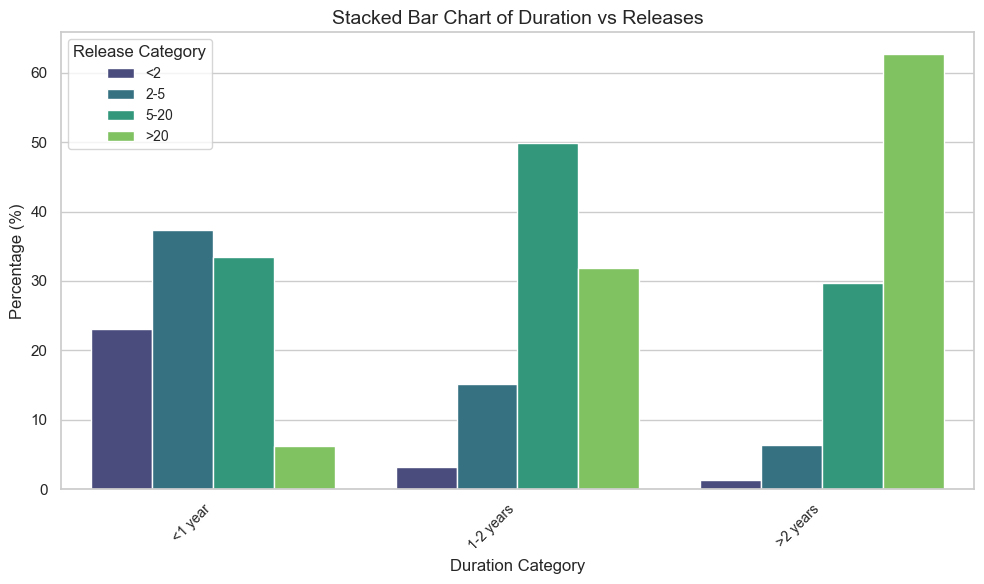

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Prepare data for plotting (convert cross_table2 to a format suitable for seaborn)
cross_table2_reset = cross_table2.reset_index().melt(
    id_vars='duration_category', 
    var_name='release_category', 
    value_name='percentage'
)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cross_table2_reset, 
    x='duration_category', 
    y='percentage', 
    hue='release_category', 
    palette='viridis'  # You can choose another palette like 'coolwarm', 'Set2', etc.
)

# Add labels and title
plt.title('Stacked Bar Chart of Duration vs Releases', fontsize=14)
plt.xlabel('Duration Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Release Category', fontsize=10, title_fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()
